## Classifier for sentiment analysis

In [1]:
import sys
sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import *
from sklearn.pipeline import *
from sklearn.preprocessing import Normalizer
from sklearn.metrics import *

from sklearn.svm import LinearSVC

from stop_words import get_stop_words
stopwords = get_stop_words('russian')

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
books_train = pd.read_csv('C:/Users/Анна/Dropbox/ML_sent/books_train.tsv', sep='\t', index_col=0)
films_train = pd.read_csv('C:/Users/Анна/Dropbox/ML_sent/films_train.tsv', sep='\t', index_col=0)

In [7]:
books_test = pd.read_csv('C:/Users/Анна/Dropbox/ML_sent/books_test.tsv', sep='\t', index_col=0)
films_test = pd.read_csv('C:/Users/Анна/Dropbox/ML_sent/films_test.tsv', sep='\t', index_col=0)

In [12]:
books_test.head()

,X_test,y_test
0,прочитать можно и даже нужно местами спорно но...,9
1,бодрая и приятная на вкус книженция идеи прост...,8
2,угу согласен но кроме того ещё и там и сям по ...,4
3,не интересно иногда забавно но очень уж не зак...,4
4,понравился контраст безжизненность красота туп...,9


In [13]:
books = pd.read_csv('C:/Users/Анна/Dropbox/ML_sent/books_full.csv', index_col=0)

In [27]:
books.head()

,marks,lemmatized,polarity,pos_neg_neut
0,6,сериал очень любить но академия и земля вызыва...,1.0,1.0
1,7,думать что быть хороший идея очень интересный ...,1.0,1.0
2,10,с творчество головачев я познакомиться посредс...,-1.0,0.0
3,5,то то я и в большой неудовольствие прочитать а...,1.0,1.0
4,6,как я показаться местами сильно смахивать на п...,1.0,1.0


In [26]:
books['polarity'] = books_train.y_train.apply(lambda x: get_polarity(x))

In [25]:
books['pos_neg_neut'] = books_train.y_train.apply(lambda x: get_3_class(x))

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
neg_books = books[books.polarity == -1]

In [36]:
pos_books = books[books.polarity == 1]

In [32]:
neg_books.head()
neg_books.shape

(1627, 4)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(neg_books.lemmatized, neg_books.polarity, test_size=0.3, random_state=42)

In [56]:
X_train.head()

5313    детектив исторический роман психологический ро...
1497                 это произведение наконец то выходить
2404    читаться легко и интересно но перечитывать нет...
625     при весь мой любовь и увлечённость фантастика ...
4395    да это классика даже умозрительно не похлопать...
Name: lemmatized, dtype: object

In [57]:
y_train.head()

5313   -1.0
1497   -1.0
2404   -1.0
625    -1.0
4395   -1.0
Name: polarity, dtype: float64

In [46]:
X_train.shape

(1138,)

In [58]:
X_train_pos = pos_books.lemmatized.head(len(X_train))
y_train_pos = pos_books.polarity.head(len(X_train))

In [59]:
X_train_pos.shape

(1138,)

In [60]:
frames = [X_train, X_train_pos]
y_frames = [y_train, y_train_pos]

In [61]:
X_train_books = pd.concat(frames)
y_train_books = pd.concat(y_frames)

In [64]:
X_train_books.shape

(2276,)

In [67]:
test_num = pos_books.shape[0] - X_train_pos.shape[0]

In [68]:
X_test_pos = pos_books.lemmatized.tail(test_num-1)
y_test_pos = pos_books.polarity.tail(test_num-1)

In [77]:
y_test_books.head()

3380   -1.0
4902   -1.0
5975   -1.0
5104   -1.0
1318   -1.0
Name: polarity, dtype: float64

In [73]:
test_frames = [X_test, X_test_pos]
test_y_frames = [y_test, y_test_pos]

In [74]:
X_test_books = pd.concat(test_frames)
y_test_books = pd.concat(test_y_frames)

### 10 classes

In [8]:
clf = Pipeline([
    ('vect', CountVectorizer(stop_words = stopwords, analyzer = 'word', ngram_range = (1,2), binary = True)),
    #('tfidf', TfidfTransformer()),
    #('svd', TruncatedSVD(n_components = 150)),
    #('norm', Normalizer() ),
    ('clf', LinearSVC()),
])


clf.fit(books_train.lemmatized, books_train.y_train)#обучение модели на обучающей выборке

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['а', 'в', '...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [16]:
books_test.X_test.values

array(['прочитать можно и даже нужно местами спорно но вцелом на твердую',
       'бодрая и приятная на вкус книженция идеи просты и незатейливы но развлекает вполне успешно порядочно мистики порядочно приключенчества симпатично не больше но и не меньше',
       'угу согласен но кроме того ещё и там и сям по кустам щедро раскиданы рояли прочитать можно но только быстро не задумываясь',
       ...,
       'в безмятежном провинциальном мирке не было агрессии но вот приходит иное время а вместе с ним и иные персонажи они разрушают счастье героев хюлле взрывают его уже самим своим существованием круговорот историй меловой круг доброты и понимания который не преодолеть нечистой силе которая может искалечить но не победить ее удел лишь земная власть даже если они навластвуются всласть то что это перед властью рассказчиков создающих свои истории из пустяков намеков и фрагментов которые в их исполнении превращаются в шедевры',
       'очень легенкое такое героическое фентези читается быстро и 

In [18]:
y_predict = clf.predict(books_test.X_test.values.astype('U'))

             precision    recall  f1-score   support

          0       0.09      0.05      0.06       245
          1       0.17      0.07      0.10        43
          2       0.23      0.10      0.14        31
          3       0.04      0.02      0.02        61
          4       0.16      0.10      0.12       105
          5       0.20      0.11      0.14       147
          6       0.18      0.02      0.03       111
          7       0.17      0.06      0.09       198
          8       0.17      0.12      0.14       442
          9       0.26      0.33      0.29       712
         10       0.34      0.54      0.42       799

avg / total       0.23      0.27      0.24      2894



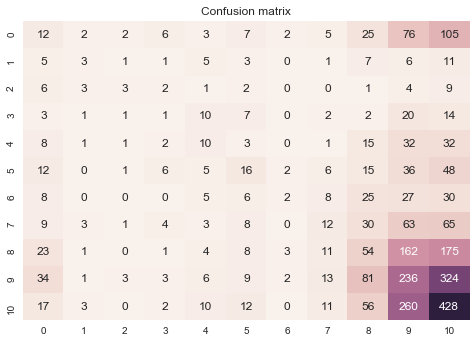

In [22]:
labels = list(set(books_test.y_test))
print(classification_report(books_test.y_test, y_predict))
sns.heatmap(data=confusion_matrix(books_test.y_test, y_predict, labels = labels), 
            annot=True, fmt="d", cbar=False)

#            , xticklabels=['male', 'female'], 
#                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

In [27]:
books_train[books_train.y_train == 7].X_train.values

array([ 'сюжет конечно захватывает так что не оторваться но на мой взгляд слишком уж все чернушно',
       'очень легкая книжка из тех что читаются на одном дыхании но и забываются через день',
       'читалось довольно приятно чувствовались некоторые веяния от икебода крейна и его безголового всадника однако шестое чувство говорило что разгадки в таких условиях для работы конестабль не найдет атмосфера такая мрачноватая главный герой не блещет ни силой ни красотой подвержен порокам в общем он человечен нет фанфар каких то и дифферамб мы видим заработавшего свое положение трудом человека измотанного жизньюю но это настоящий человек не бутафория а потому и интересно следить за ним интересно идти за ним по его пути',
       'в тридцать лет перечитаю сравню',
       'прошу добавить ссылку на книгу для скачивания вообще поиск книг',
       'необычное видение мира со стороны умственно отсталого мальчика его переживания взгляды на жизнь родителей попытки строить свою судьбу самостоятельно',


### Positive / Negative

In [15]:
def get_polarity(x):
    return 1 if x>6 else -1

In [10]:
books_train['polarity'] = books_train.y_train.apply(lambda x: get_polarity(x))

In [12]:
books_train.head()

,lemmatized,X_train,y_train,polarity
0,отличный пример боев фантастика нет такой пере...,отличный пример боевой фантастики нет таких пе...,9,1
1,читать данный произведение в журнальный вариан...,читала данное произведение в журнальном вариан...,10,1
2,если бы я прочитать этот книга в начало го век...,если бы я прочитал эту книгу в начале го века ...,6,-1
3,я книга очень понравиться заставить глубокий п...,мне книга очень понравилась заставила глубже п...,10,1
4,очень хотеть полюбить,очень хочу полюбить,10,1


In [13]:
books_test['polarity'] = books_test.y_test.apply(lambda x: get_polarity(x))

In [82]:
y_train_books_int = []

TypeError: cannot convert the series to <class 'int'>

In [84]:
clf2 = Pipeline([
    ('vect', CountVectorizer(stop_words = stopwords, analyzer = 'word', ngram_range = (1,3), binary = True)),
    #('tfidf', TfidfTransformer()),
    #('svd', TruncatedSVD(n_components = 150)),
    #('norm', Normalizer() ),
    ('clf', LinearSVC()),
])


clf2.fit(X_train_books.values.astype('U'), y_train_books.values)#обучение модели на обучающей выборке

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None,
        stop_words=['а', 'в', '...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [85]:
y_predict_2 = clf2.predict(X_test_books.values.astype('U'))

             precision    recall  f1-score   support

       -1.0       0.11      0.52      0.18       489
        1.0       0.89      0.47      0.62      3970

avg / total       0.80      0.48      0.57      4459



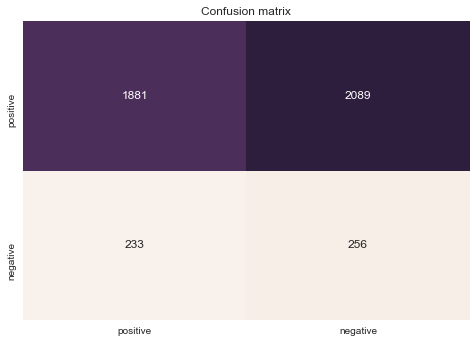

In [90]:
labels = list(set(y_test_books.values))
print(classification_report(y_test_books, y_predict_2))
sns.heatmap(data=confusion_matrix(y_test_books, y_predict_2, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['positive', 'negative'], 
                                             yticklabels=['positive', 'negative'])
plt.title("Confusion matrix")
plt.show()

### Positive / Negative / Neutral

In [17]:
def get_3_class(x):
    if x<6:
        polarity = -1
    elif x<8:
        polarity = 0
    else:
        polarity = 1
    return polarity

In [18]:
books_train['pos_neg_neut'] = books_train.y_train.apply(lambda x: get_3_class(x))

In [19]:
books_test['pos_neg_neut'] = books_test.y_test.apply(lambda x: get_3_class(x))

In [20]:
clf3 = Pipeline([
    ('vect', CountVectorizer(stop_words = stopwords, analyzer = 'word', ngram_range = (1,3), binary = True)),
    ('tfidf', TfidfTransformer()),
    #('svd', TruncatedSVD(n_components = 150)),
    #('norm', Normalizer() ),
    ('clf', LinearSVC()),
])


clf3.fit(books_train.X_train, books_train.pos_neg_neut)#обучение модели на обучающей выборке

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None,
        stop_words=['а', 'в', '...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [21]:
y_predict_3 = clf3.predict(books_test.X_test.values.astype('U'))

             precision    recall  f1-score   support

         -1       0.70      0.24      0.35       632
          0       0.41      0.04      0.07       309
          1       0.72      0.98      0.83      1953

avg / total       0.68      0.72      0.64      2894



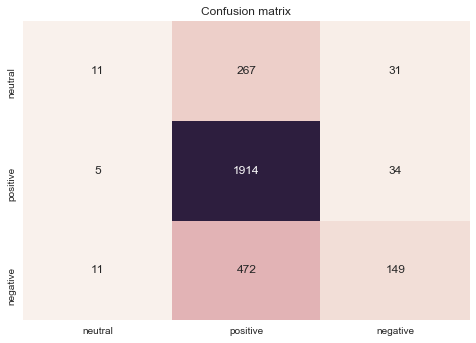

In [22]:
labels = list(set(books_test.pos_neg_neut))
print(classification_report(books_test.pos_neg_neut, y_predict_3))
sns.heatmap(data=confusion_matrix(books_test.pos_neg_neut, y_predict_3, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['neutral', 'positive', 'negative'], 
                                                yticklabels=['neutral', 'positive', 'negative'])
plt.title("Confusion matrix")
plt.show()

### Delta TFIDF

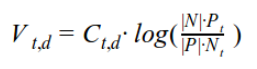

* V(t,d) — вес слова t в документе d
* С(t,d) — кол-во вхождений слова t в документ d
* |P| — кол-во документов с положительной тональностью
* |N| — кол-во документов с отрицательной тональностью
* Pt — кол-во положительных документов, в которые входит слово t
* Nt — кол-во отрицательных документов, в которые входит слово t

In [92]:
from sklearn_deltatfidf import DeltaTfidfVectorizer

In [84]:
"""v = DeltaTfidfVectorizer()
data = ['word1 word2', 'word2', 'word2 word3', 'word4']
labels = [1, -1, -1, 1]
v.fit_transform(data, labels)"""

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [86]:
v = DeltaTfidfVectorizer()
v.fit_transform(list(books_train.lemmatized.values), list(books_train.polarity.values))

<6736x18199 sparse matrix of type '<class 'numpy.float64'>'
	with 167273 stored elements in Compressed Sparse Row format>

In [93]:
clf4 = Pipeline([
      ('vect', DeltaTfidfVectorizer()),
      ('clf', LinearSVC())
  ])
clf4.fit(list(X_train_books.values.astype('U')), list(y_train_books.values))

Pipeline(steps=[('vect', DeltaTfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), norm='l2', preprocessor=None,
     ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [94]:
clf4 = Pipeline([
      ('vect', DeltaTfidfVectorizer(stop_words = stopwords, analyzer = 'word', ngram_range = (1,3))),
      ('clf', LinearSVC())
  ])
clf4.fit(list(X_train_books.values.astype('U')), list(y_train_books.values))

Pipeline(steps=[('vect', DeltaTfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 3), norm='l2', preprocessor=None,
     ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [95]:
y_predict_4 = clf4.predict(X_test_books.values.astype('U'))

             precision    recall  f1-score   support

       -1.0       0.11      0.07      0.08       489
        1.0       0.89      0.93      0.91      3970

avg / total       0.80      0.84      0.82      4459



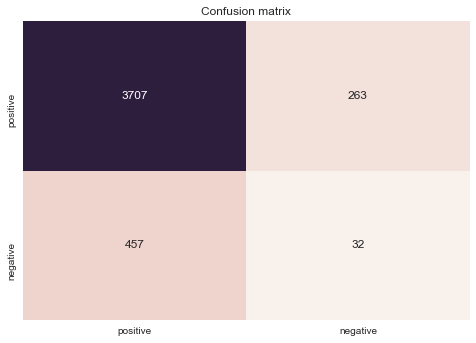

In [96]:
labels = list(set(y_test_books))
print(classification_report(y_test_books, y_predict_4))
sns.heatmap(data=confusion_matrix(y_test_books, y_predict_4, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['positive', 'negative'], 
                                                yticklabels=['positive', 'negative'])
plt.title("Confusion matrix")
plt.show()

### Classifier with lexicon

In [97]:
books_rand = pd.read_csv('C:/Users/Анна/Dropbox/ML_sent/random_walk_eval/random_walk_values.csv', index_col=0)

In [98]:
sent_high = books_rand[books_rand['values'] > 0.8]

In [99]:
sent_words = list(set(sent_high['keys'].values))

In [100]:
sent_words[:20]

['очерк',
 'поэма',
 'мор',
 'приходить',
 'несчастие',
 'ошибочный',
 'трагедия',
 'огненный',
 'тяжеловатый',
 'нудный',
 'дронов',
 'скоротать',
 'состояние',
 'счастливый',
 'словечко',
 'отсутствовать',
 'терять',
 'невкусно',
 'хрипло',
 'спина']

In [101]:
word_to_index = {word: index for index, word in enumerate(sent_words)}
len(word_to_index)

250

In [102]:
def encode_text(text, word_dictionary):
    onehot_vec = np.zeros((len(word_dictionary)))
    for w, index in word_dictionary.items():
        if w in text:
            onehot_vec[index] = 1
    return onehot_vec
            
        

In [50]:
'ура' in sent_words

False

In [112]:
encode_text(X_train_books[0], word_to_index)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [113]:
X_train_encoded = np.array([encode_text(text, word_to_index) for text in X_train_books.values.astype('U')])

In [114]:
X_train_encoded.shape

(2276, 250)

In [115]:
X_test_encoded = np.array([encode_text(text, word_to_index) for text in X_test_books.values.astype('U')])

In [116]:
clf_s = Pipeline([
    #('vect', CountVectorizer(stop_words = stopwords, analyzer = 'word', ngram_range = (1,3), binary = True)),
    #('tfidf', TfidfTransformer()),
    #('svd', TruncatedSVD(n_components = 150)),
    #('norm', Normalizer() ),
    ('clf', LinearSVC()),
])


clf_s.fit(X_train_encoded, y_train_books)#обучение модели на обучающей выборке

Pipeline(steps=[('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [117]:
y_predict_s = clf_s.predict(X_test_encoded)

             precision    recall  f1-score   support

       -1.0       0.11      0.67      0.19       489
        1.0       0.89      0.32      0.47      3970

avg / total       0.80      0.36      0.44      4459



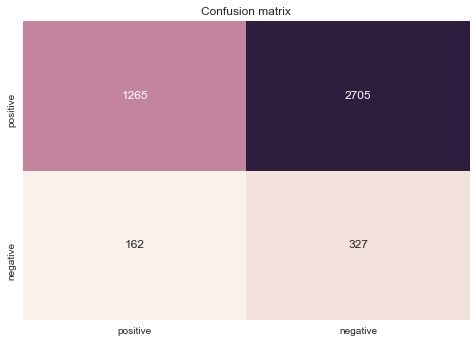

In [119]:
labels = list(set(y_test_books))
print(classification_report(y_test_books, y_predict_s))
sns.heatmap(data=confusion_matrix(y_test_books, y_predict_s, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['positive', 'negative'], 
                                                yticklabels=['positive', 'negative'])
plt.title("Confusion matrix")
plt.show()

In [117]:
example = books_test.X_test.values[:1005]

In [118]:
print(example)

[ 'очень жесткая книга про несгибаемые характеры брутальных лесорубов но этим она и захватывает'
 'это даже не о войне это о судьбе мне понравилось'
 'легкая забавная книга поднимает настроение'
 'хочу нового характера а в обломове нового характера нет это всё уже было и обломов и штольц и даже ольга образ собирательный из предшествующих женщин героинь здесь я полностью согласна с добролюбовым который писал обломов есть лицо не совсем новое в нашей литературе родовые черты обломовского типа мы находим ещё в онегине и затем несколько раз встречаем их повторения в лучших наших литературных произведениях дело в том что это коренной тип наш от которого не мог отделаться ни один из наших серьезных художников поэтому кроме как для приятного чтения никак сею книгу охарактеризовать не могу хотя сама читала со скрипом ибо уж очень нудно'
 'класная книга мне тоже понравилась и совсем не нудная']


In [120]:
print(books_test.y_test[1000:1005])

1000     0
1001    10
1002     9
1003     4
1004     8
Name: y_test, dtype: int64


In [127]:
clf4.predict(['я очарован я полон блаженства', 'полный отстой'])

array([ 1, -1], dtype=int64)